In [1]:
import tensorflow

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [3]:
from xgboost import XGBClassifier
import pandas as pd  
import numpy as np  
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


In [5]:
df.PMV_Level

0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [6]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Categorical
Feature: Age, Category: Categorical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Categorical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C) , Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Categorical
Feature: Lighting_Level, Category: Categorical


In [7]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("IUBAT_Testing7.csv")

# Get the unique class names from the 'PMV_Level' column
class_names = df['PMV_Level'].unique()

# Display all the unique class names
print("Unique class names in the 'PMV_Level' column:")
for class_name in class_names:
    print(class_name)

Unique class names in the 'PMV_Level' column:
Neutral
Warm
Slightly Cool
Hot
Cold
Slightly Warm
Cool


In [8]:
df.PMV_Level


0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [9]:
df.PMV_Level

0             Neutral
1             Neutral
2                Warm
3                Warm
4       Slightly Cool
            ...      
1082              Hot
1083              Hot
1084          Neutral
1085              Hot
1086          Neutral
Name: PMV_Level, Length: 1087, dtype: object

In [10]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [11]:
df.head() 

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [12]:
inputs = df.drop(['PMV_Level',], axis='columns')

In [13]:
target = df['PMV_Level']

In [14]:
inputs

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [15]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [16]:
import pandas as pd

# Assuming your input feature data is stored in 'df'
data_shape = df.shape
print(data_shape)

(1087, 16)


In [17]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [18]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
feature_categories = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numeric data
    if np.issubdtype(df[column].dtype, np.number):
        feature_categories[column] = 'Numerical'
    else:
        feature_categories[column] = 'Categorical'

# Print feature categories
for feature, category in feature_categories.items():
    print(f"Feature: {feature}, Category: {category}")

Feature: Gender, Category: Numerical
Feature: Age, Category: Numerical
Feature: Study_Level, Category: Numerical
Feature: Floor_Level, Category: Numerical
Feature: Room_Orientation, Category: Numerical
Feature: No_Lights, Category: Numerical
Feature: No_Fans, Category: Numerical
Feature: No_Windows, Category: Numerical
Feature: No_Doors, Category: Numerical
Feature: Floor_Area, Category: Numerical
Feature: Distan_Windows, Category: Numerical
Feature: Temperature_(°C), Category: Numerical
Feature: Humidity_(%), Category: Numerical
Feature: CO2_(PPM), Category: Numerical
Feature: PMV_Level, Category: Numerical
Feature: Lighting_Level, Category: Numerical


In [19]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [20]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [21]:
# Define SMOTE-Tomek Links
resample=SMOTEENN(random_state =42)
X, y = resample.fit_resample(X, y)

In [22]:
y.value_counts()

PMV_Level
4    236
6    134
2     96
3     81
0     37
5     21
1     12
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
scaler = MinMaxScaler()

In [27]:
# Prevent data leakage by only fitting scaler to train data
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used for feature selection

In [29]:
from sklearn.decomposition import PCA

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2338 - loss: 1.9217 - val_accuracy: 0.6202 - val_loss: 1.5095
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5985 - loss: 1.4731 - val_accuracy: 0.6357 - val_loss: 1.2381
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6484 - loss: 1.1698 - val_accuracy: 0.6434 - val_loss: 1.0600
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6328 - loss: 1.0280 - val_accuracy: 0.7287 - val_loss: 0.9301
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.8378 - val_accuracy: 0.7364 - val_loss: 0.8506
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7773 - loss: 0.7685 - val_accuracy: 0.7442 - val_loss: 0.7801
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7956 - loss: 0.6479 - val_accuracy: 0.8062 - val_loss: 0.7167
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8455 - loss: 0.5905 - val_accuracy: 0.8217 - val_loss: 0.

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0376 - val_accuracy: 0.9845 - val_loss: 0.1775
Epoch 52/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0369 - val_accuracy: 0.9845 - val_loss: 0.1764
Epoch 53/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0310 - val_accuracy: 0.9845 - val_loss: 0.1773
Epoch 54/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0246 - val_accuracy: 0.9845 - val_loss: 0.1753
Epoch 55/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0255 - val_accuracy: 0.9845 - val_loss: 0.1758
Epoch 56/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0289 - val_accuracy: 0.9845 - val_loss: 0.1752
Epoch 57/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0305 - val_accuracy: 0.9845 - val_loss: 0.1752
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       1.00 

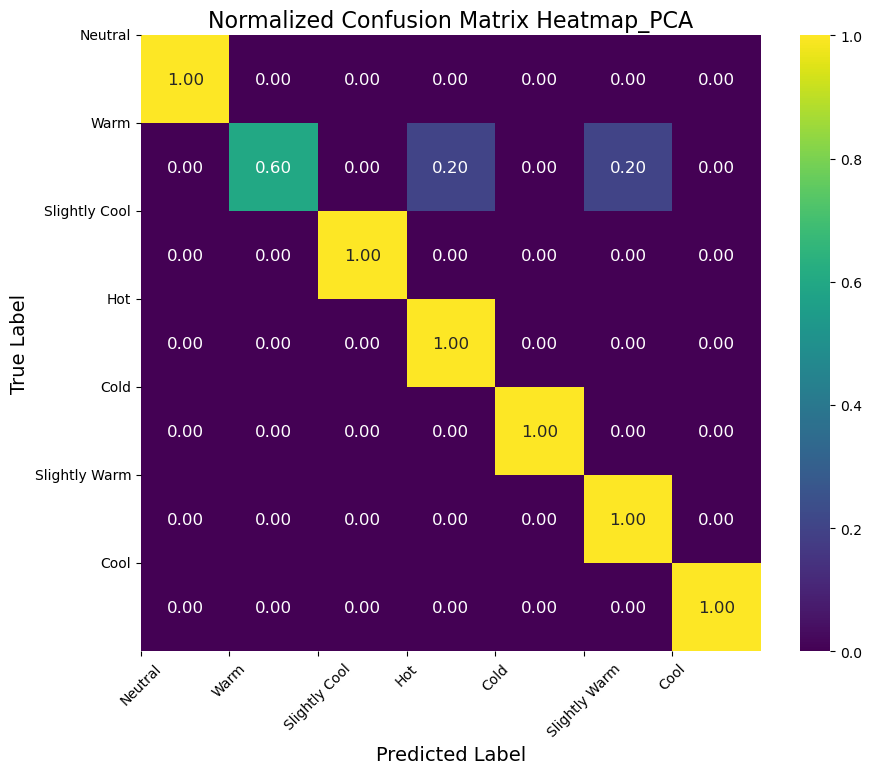

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Data preprocessing
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
inputs = df.drop(['PMV_Level','Floor_Level' ], axis='columns')
target = df['PMV_Level']

# Apply SMOTEENN for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(inputs, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=X_train_scaled.shape[1])
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the number of input features and number of classes
input_dim = X_train_pca.shape[1]
num_classes = len(np.unique(y_train))

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_pca = model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Compute and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
conf_matrix_norm_pca = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]



# Assuming conf_matrix_norm_pca is your normalized confusion matrix and class_names is defined
# Ensure that conf_matrix_norm_pca is a 2D numpy array

class_names = ['Neutral', 'Warm', 'Slightly Cool', 'Hot', 'Cold', 'Slightly Warm', 'Cool']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm_pca, annot=True, fmt=".2f", cmap='viridis', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Normalized Confusion Matrix Heatmap_PCA', fontsize=16)
plt.show()

In [31]:
# Assuming conf_matrix_norm is your normalized confusion matrix
# Assuming class_names is defined

# Convert the normalized confusion matrix to a 2D numpy array for easier manipulation
conf_matrix_array = np.array(conf_matrix_norm_pca)

# Print the normalized confusion matrix values in text form
for i in range(len(class_names)):
    for j in range(len(class_names)):
        print(f"True label: {class_names[i]}, Predicted label: {class_names[j]}, Value: {conf_matrix_array[i, j]}")

True label: Neutral, Predicted label: Neutral, Value: 1.0
True label: Neutral, Predicted label: Warm, Value: 0.0
True label: Neutral, Predicted label: Slightly Cool, Value: 0.0
True label: Neutral, Predicted label: Hot, Value: 0.0
True label: Neutral, Predicted label: Cold, Value: 0.0
True label: Neutral, Predicted label: Slightly Warm, Value: 0.0
True label: Neutral, Predicted label: Cool, Value: 0.0
True label: Warm, Predicted label: Neutral, Value: 0.0
True label: Warm, Predicted label: Warm, Value: 0.6
True label: Warm, Predicted label: Slightly Cool, Value: 0.0
True label: Warm, Predicted label: Hot, Value: 0.2
True label: Warm, Predicted label: Cold, Value: 0.0
True label: Warm, Predicted label: Slightly Warm, Value: 0.2
True label: Warm, Predicted label: Cool, Value: 0.0
True label: Slightly Cool, Predicted label: Neutral, Value: 0.0
True label: Slightly Cool, Predicted label: Warm, Value: 0.0
True label: Slightly Cool, Predicted label: Slightly Cool, Value: 1.0
True label: Slig

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.9767441860465116


In [33]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.60      0.75         5
           2       0.95      1.00      0.97        19
           3       0.91      1.00      0.95        10
           4       1.00      0.98      0.99        47
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00        37

    accuracy                           0.98       129
   macro avg       0.96      0.94      0.94       129
weighted avg       0.98      0.98      0.98       129



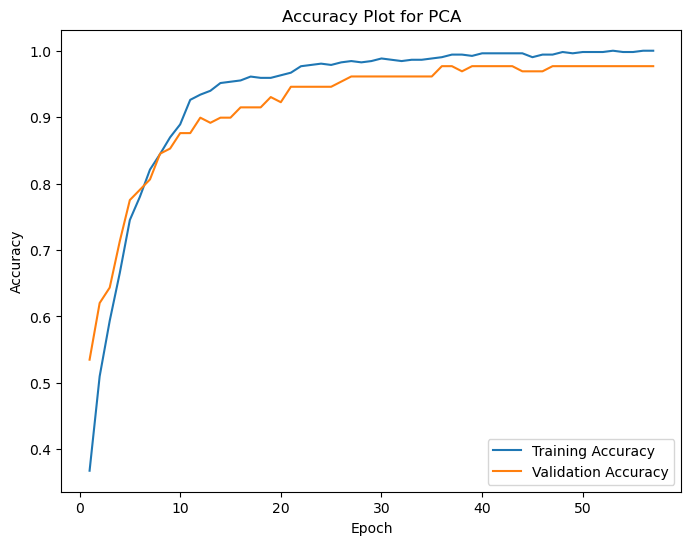

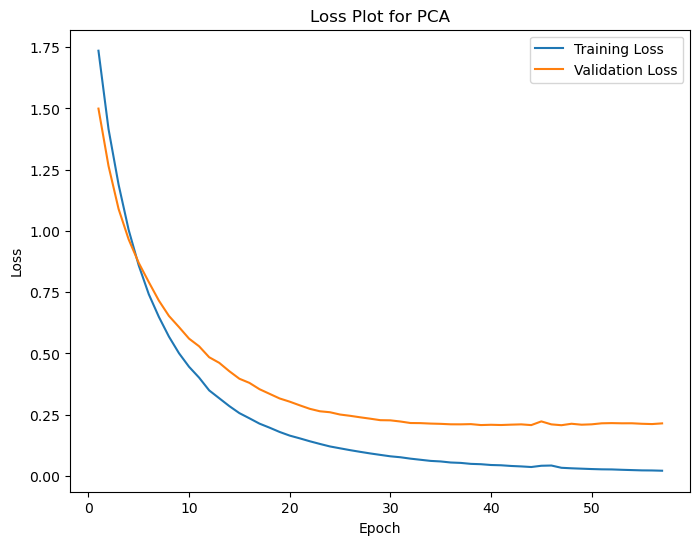

In [34]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_pca.history['accuracy']
val_accuracy = history_pca.history['val_accuracy']
loss = history_pca.history['loss']
val_loss = history_pca.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for PCA')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Feature Importance for Random Forest-based ANN Model

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2691 - loss: 1.8998 - val_accuracy: 0.6047 - val_loss: 1.5677
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5705 - loss: 1.5034 - val_accuracy: 0.6279 - val_loss: 1.3111
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 1.2710 - val_accuracy: 0.6667 - val_loss: 1.1350
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6283 - loss: 1.0870 - val_accuracy: 0.6899 - val_loss: 1.0081
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.9268 - val_accuracy: 0.7132 - val_loss: 0.9023
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 0.7538 - val_accuracy: 0.7364 - val_loss: 0.8192
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.7032 - val_accuracy: 0.7829 - val_loss: 0.7533
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.6487 - val_accuracy: 0.8062 - val_loss: 0.

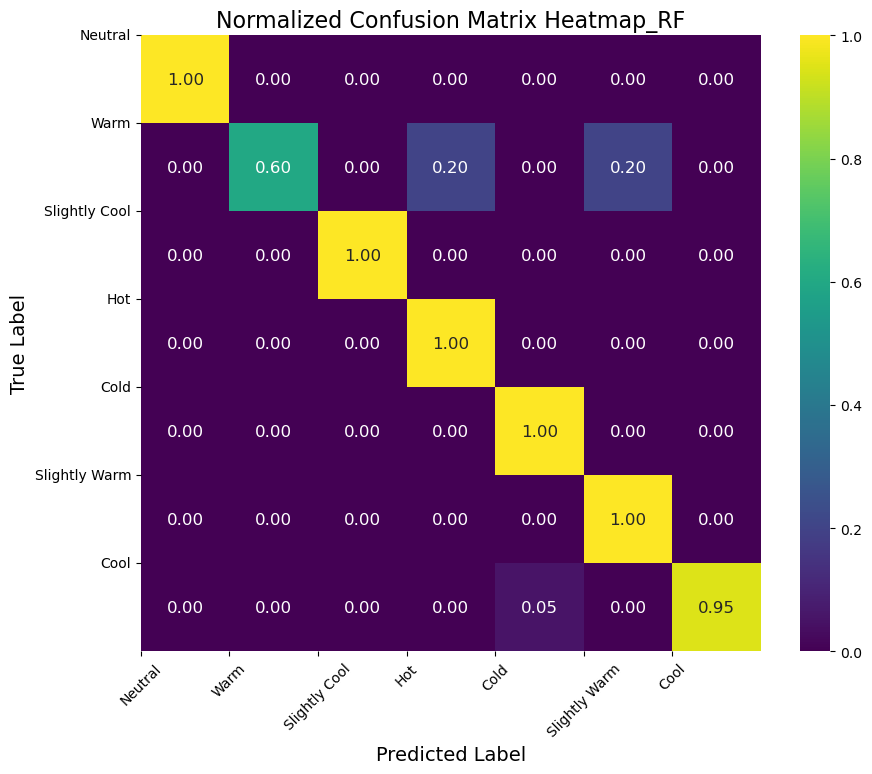

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Preprocess the data
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
X = df.drop(['PMV_Level', 'Floor_Level'], axis=1)
y = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a tree-based model for feature importance
tree_model = RandomForestClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = tree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top features based on importance
num_features_to_select = 10  # Number of features to select
selected_feature_indices = sorted_indices[:num_features_to_select]

# Select the corresponding features from the dataset
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Define your model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features_to_select,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Multiclass classification with 7 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_rf = model.fit(X_train_selected, y_train, validation_data=(X_test_selected, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Compute and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
conf_matrix_norm_rf = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the normalized confusion matrix
class_names = ['Neutral', 'Warm', 'Slightly Cool', 'Hot', 'Cold', 'Slightly Warm', 'Cool']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm_rf, annot=True, fmt=".2f", cmap='viridis', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Normalized Confusion Matrix Heatmap_RF', fontsize=16)
plt.show()

In [44]:
# Assuming conf_matrix_norm is your normalized confusion matrix
# Assuming class_names is defined

# Convert the normalized confusion matrix to a 2D numpy array for easier manipulation
conf_matrix_array = np.array(conf_matrix_norm_rf)

# Print the normalized confusion matrix values in text form
for i in range(len(class_names)):
    for j in range(len(class_names)):
        print(f"True label: {class_names[i]}, Predicted label: {class_names[j]}, Value: {conf_matrix_array[i, j]}")

True label: Neutral, Predicted label: Neutral, Value: 1.0
True label: Neutral, Predicted label: Warm, Value: 0.0
True label: Neutral, Predicted label: Slightly Cool, Value: 0.0
True label: Neutral, Predicted label: Hot, Value: 0.0
True label: Neutral, Predicted label: Cold, Value: 0.0
True label: Neutral, Predicted label: Slightly Warm, Value: 0.0
True label: Neutral, Predicted label: Cool, Value: 0.0
True label: Warm, Predicted label: Neutral, Value: 0.0
True label: Warm, Predicted label: Warm, Value: 0.6
True label: Warm, Predicted label: Slightly Cool, Value: 0.0
True label: Warm, Predicted label: Hot, Value: 0.2
True label: Warm, Predicted label: Cold, Value: 0.0
True label: Warm, Predicted label: Slightly Warm, Value: 0.2
True label: Warm, Predicted label: Cool, Value: 0.0
True label: Slightly Cool, Predicted label: Neutral, Value: 0.0
True label: Slightly Cool, Predicted label: Warm, Value: 0.0
True label: Slightly Cool, Predicted label: Slightly Cool, Value: 1.0
True label: Slig

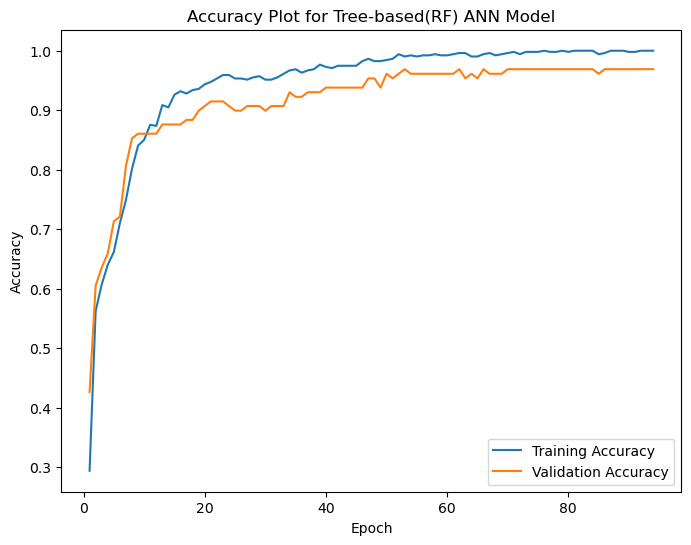

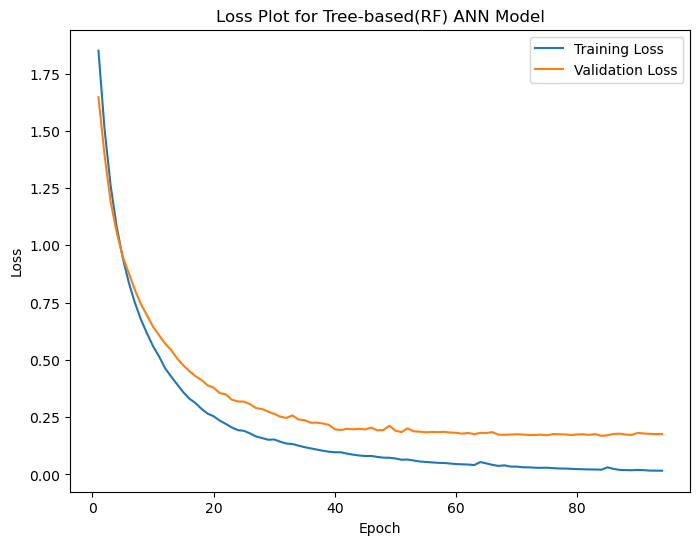

In [41]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_rf.history['accuracy']
val_accuracy = history_rf.history['val_accuracy']
loss = history_rf.history['loss']
val_loss = history_rf.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Tree-based(RF) ANN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Feature Selection by Lasso using ANN

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2242 - loss: 2.3969 - val_accuracy: 0.6047 - val_loss: 2.0570
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5911 - loss: 2.0149 - val_accuracy: 0.6822 - val_loss: 1.8307
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 1.7347 - val_accuracy: 0.6744 - val_loss: 1.6820
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 1.5488 - val_accuracy: 0.7132 - val_loss: 1.5563
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 1.4566 - val_accuracy: 0.7597 - val_loss: 1.4467
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7759 - loss: 1.3083 - val_accuracy: 0.7752 - val_loss: 1.3625
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 1.2052 - val_accuracy: 0.8062 - val_loss: 1.2974
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 1.1637 - val_accuracy: 0.8217 - val_loss: 1.

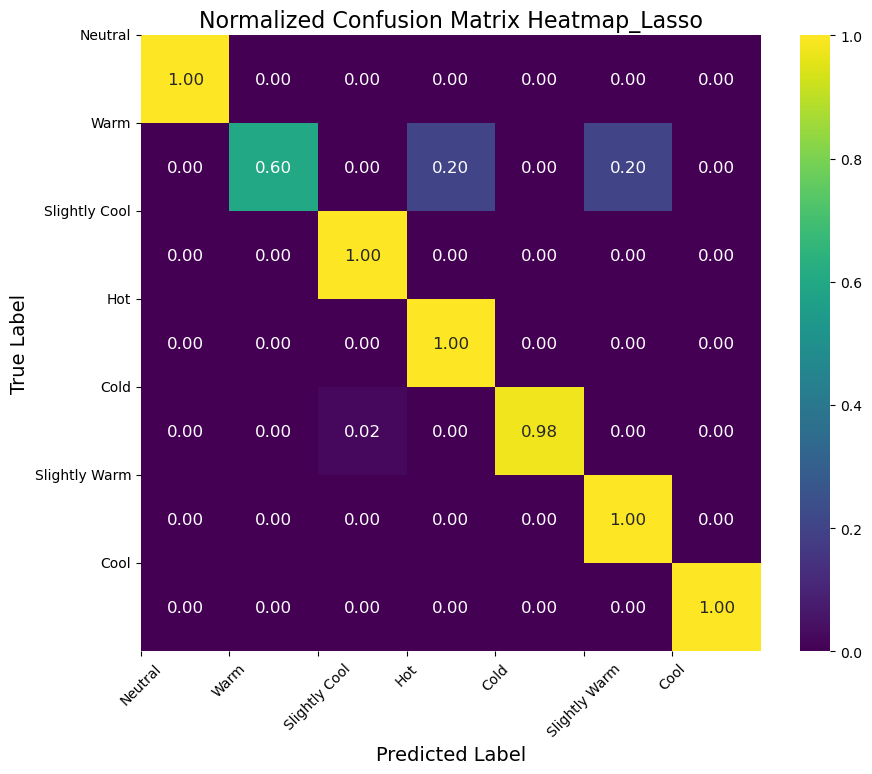

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import regularizers
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Preprocess the data
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
X = df.drop(['PMV_Level','Floor_Level'], axis=1)
y = df['PMV_Level']

# Apply SMOTE-Tomek Links for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your model architecture with L1 regularization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(7, activation='softmax'))  # Multiclass classification with 7 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_lasso = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Compute and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
conf_matrix_norm_lasso = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the normalized confusion matrix
class_names = ['Neutral', 'Warm', 'Slightly Cool', 'Hot', 'Cold', 'Slightly Warm', 'Cool']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm_lasso, annot=True, fmt=".2f", cmap='viridis', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Normalized Confusion Matrix Heatmap_Lasso', fontsize=16)
plt.show()

In [44]:
# Assuming conf_matrix_norm is your normalized confusion matrix
# Assuming class_names is defined

# Convert the normalized confusion matrix to a 2D numpy array for easier manipulation
conf_matrix_array = np.array(conf_matrix_norm_lasso)

# Print the normalized confusion matrix values in text form
for i in range(len(class_names)):
    for j in range(len(class_names)):
        print(f"True label: {class_names[i]}, Predicted label: {class_names[j]}, Value: {conf_matrix_array[i, j]}")

True label: Neutral, Predicted label: Neutral, Value: 1.0
True label: Neutral, Predicted label: Warm, Value: 0.0
True label: Neutral, Predicted label: Slightly Cool, Value: 0.0
True label: Neutral, Predicted label: Hot, Value: 0.0
True label: Neutral, Predicted label: Cold, Value: 0.0
True label: Neutral, Predicted label: Slightly Warm, Value: 0.0
True label: Neutral, Predicted label: Cool, Value: 0.0
True label: Warm, Predicted label: Neutral, Value: 0.0
True label: Warm, Predicted label: Warm, Value: 0.6
True label: Warm, Predicted label: Slightly Cool, Value: 0.0
True label: Warm, Predicted label: Hot, Value: 0.2
True label: Warm, Predicted label: Cold, Value: 0.0
True label: Warm, Predicted label: Slightly Warm, Value: 0.2
True label: Warm, Predicted label: Cool, Value: 0.0
True label: Slightly Cool, Predicted label: Neutral, Value: 0.0
True label: Slightly Cool, Predicted label: Warm, Value: 0.0
True label: Slightly Cool, Predicted label: Slightly Cool, Value: 1.0
True label: Slig

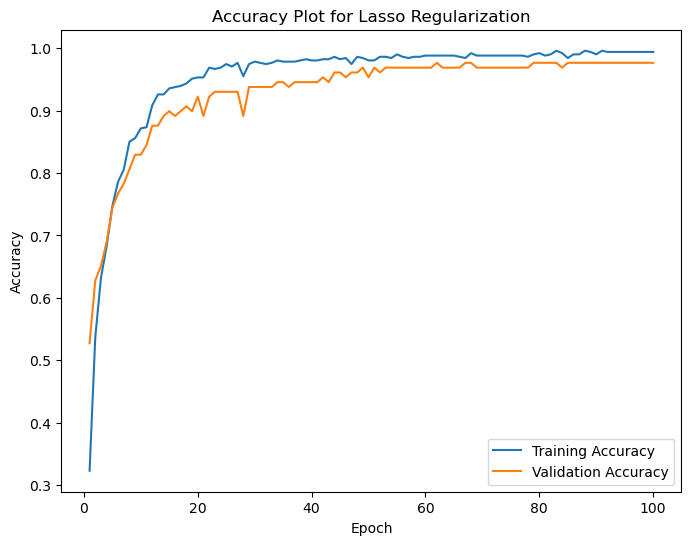

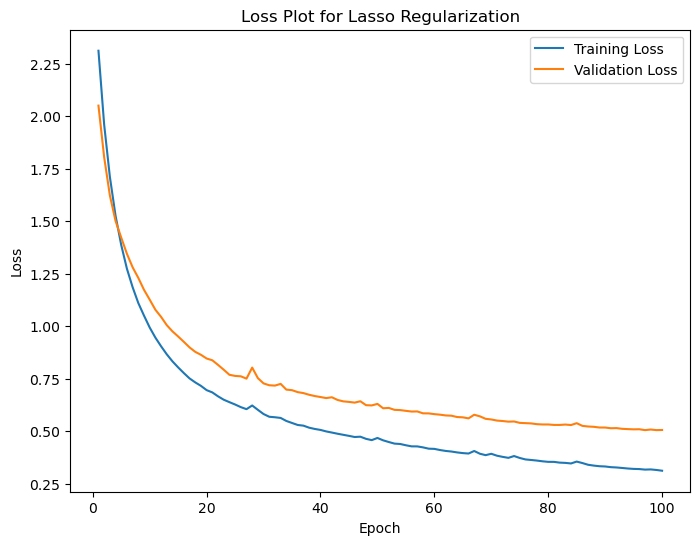

In [45]:
import matplotlib.pyplot as plt

# Get accuracy and loss values from the training history
accuracy = history_lasso.history['accuracy']
val_accuracy = history_lasso.history['val_accuracy']
loss = history_lasso.history['loss']
val_loss = history_lasso.history['val_loss']

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss Plot for Lasso Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Recursive Feature Elimination (RFE) with an Artificial Neural Network (ANN)

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1776 - loss: 1.8903 - val_accuracy: 0.5969 - val_loss: 1.6991
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5687 - loss: 1.6749 - val_accuracy: 0.7054 - val_loss: 1.5357
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 1.4935 - val_accuracy: 0.7209 - val_loss: 1.3962
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 1.3358 - val_accuracy: 0.7364 - val_loss: 1.2604
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6790 - loss: 1.2267 - val_accuracy: 0.7287 - val_loss: 1.1309
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7127 - loss: 1.1064 - val_accuracy: 0.7364 - val_loss: 1.0526
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 1.0228 - val_accuracy: 0.7597 - val_loss: 0.9984
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7124 - loss: 0.9844 - val_accuracy: 0.7442 - val_loss: 0.

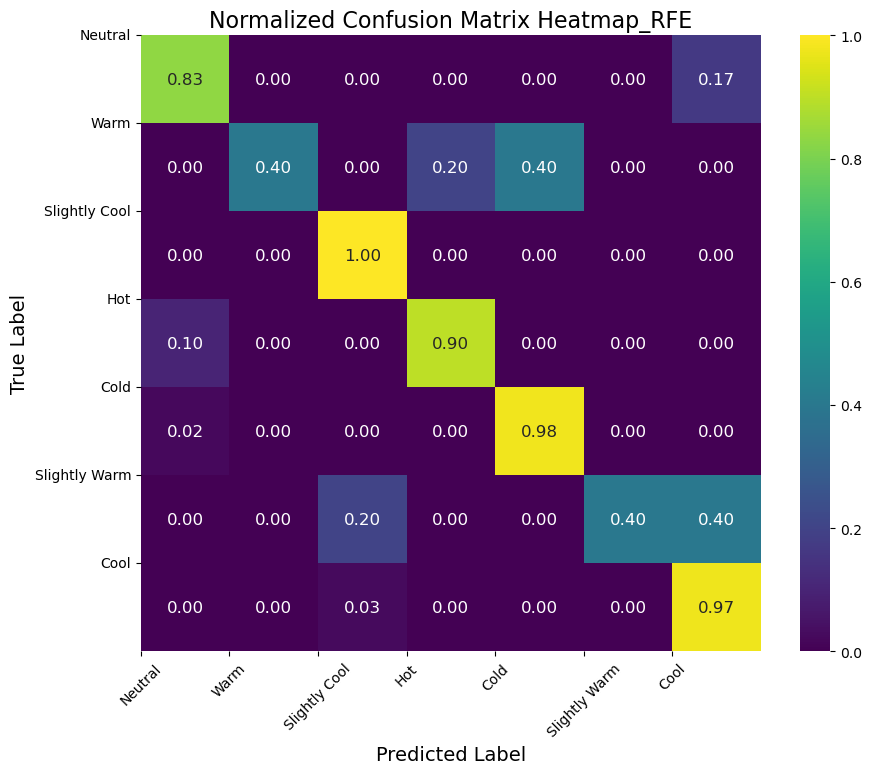

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv("IUBAT_Testing7.csv")

# Data preprocessing
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Separate inputs and target variable
X = df.drop(['PMV_Level', 'Floor_Level'], axis='columns')
y = df['PMV_Level']

# Apply SMOTEENN for balancing the classes
resample = SMOTEENN(random_state=42)
X_resampled, y_resampled = resample.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the estimator for RFE
estimator = RandomForestClassifier()

# Define the number of features to select
n_features = 5

# Apply RFE
rfe = RFE(estimator, n_features_to_select=n_features)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Define the number of input features and number of classes
input_dim = X_train_rfe.shape[1]
num_classes = len(np.unique(y_train))

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history_rfe = model.fit(X_train_rfe, y_train, validation_data=(X_test_rfe, y_test), epochs=100, callbacks=[early_stop])

# Evaluate the model on the test set
y_pred = model.predict(X_test_rfe)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

# Compute and normalize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
conf_matrix_norm_rfe = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the normalized confusion matrix
class_names = ['Neutral', 'Warm', 'Slightly Cool', 'Hot', 'Cold', 'Slightly Warm', 'Cool']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm_rfe, annot=True, fmt=".2f", cmap='viridis', xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=0)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Normalized Confusion Matrix Heatmap_RFE', fontsize=16)
plt.show()

In [16]:
# Assuming conf_matrix_norm is your normalized confusion matrix
# Assuming class_names is defined

# Convert the normalized confusion matrix to a 2D numpy array for easier manipulation
conf_matrix_array = np.array(conf_matrix_norm_rfe)

# Print the normalized confusion matrix values in text form
for i in range(len(class_names)):
    for j in range(len(class_names)):
        print(f"True label: {class_names[i]}, Predicted label: {class_names[j]}, Value: {conf_matrix_array[i, j]}")

True label: Neutral, Predicted label: Neutral, Value: 0.8333333333333334
True label: Neutral, Predicted label: Warm, Value: 0.0
True label: Neutral, Predicted label: Slightly Cool, Value: 0.0
True label: Neutral, Predicted label: Hot, Value: 0.0
True label: Neutral, Predicted label: Cold, Value: 0.0
True label: Neutral, Predicted label: Slightly Warm, Value: 0.0
True label: Neutral, Predicted label: Cool, Value: 0.16666666666666666
True label: Warm, Predicted label: Neutral, Value: 0.0
True label: Warm, Predicted label: Warm, Value: 0.4
True label: Warm, Predicted label: Slightly Cool, Value: 0.0
True label: Warm, Predicted label: Hot, Value: 0.2
True label: Warm, Predicted label: Cold, Value: 0.4
True label: Warm, Predicted label: Slightly Warm, Value: 0.0
True label: Warm, Predicted label: Cool, Value: 0.0
True label: Slightly Cool, Predicted label: Neutral, Value: 0.0
True label: Slightly Cool, Predicted label: Warm, Value: 0.0
True label: Slightly Cool, Predicted label: Slightly Co